In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('Admission_prediction.csv')

In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337.0,118.0,4.0,4.5,4.5,9.65,1,0.92
1,2,324.0,107.0,4.0,4.0,4.5,8.87,1,0.76
2,3,NaN,104.0,3.0,3.0,3.5,8.00,1,0.72
3,4,322.0,110.0,3.0,3.5,2.5,8.67,1,0.80
4,5,314.0,103.0,2.0,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(500, 9)

In [7]:
data.isna().sum()

Serial No.            0
GRE Score            15
TOEFL Score          10
University Rating    15
SOP                   0
LOR                   0
CGPA                  0
Research              0
Chance of Admit       0
dtype: int64

In [13]:
data['GRE Score'] = data['GRE Score'].fillna(data['GRE Score'].mean())

In [17]:
data['TOEFL Score'] = data['TOEFL Score'].fillna(data['TOEFL Score'].mean())

In [18]:
data['University Rating'] = data['University Rating'].fillna(data['University Rating'].mode()[0])

In [19]:
data.isna().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [23]:
data = data.drop(columns = ['Serial No.'])

In [24]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337.000000,118.0,4.0,4.5,4.5,9.65,1,0.92
1,324.000000,107.0,4.0,4.0,4.5,8.87,1,0.76
2,316.558763,104.0,3.0,3.0,3.5,8.00,1,0.72
3,322.000000,110.0,3.0,3.5,2.5,8.67,1,0.80
4,314.000000,103.0,2.0,2.0,3.0,8.21,0,0.65


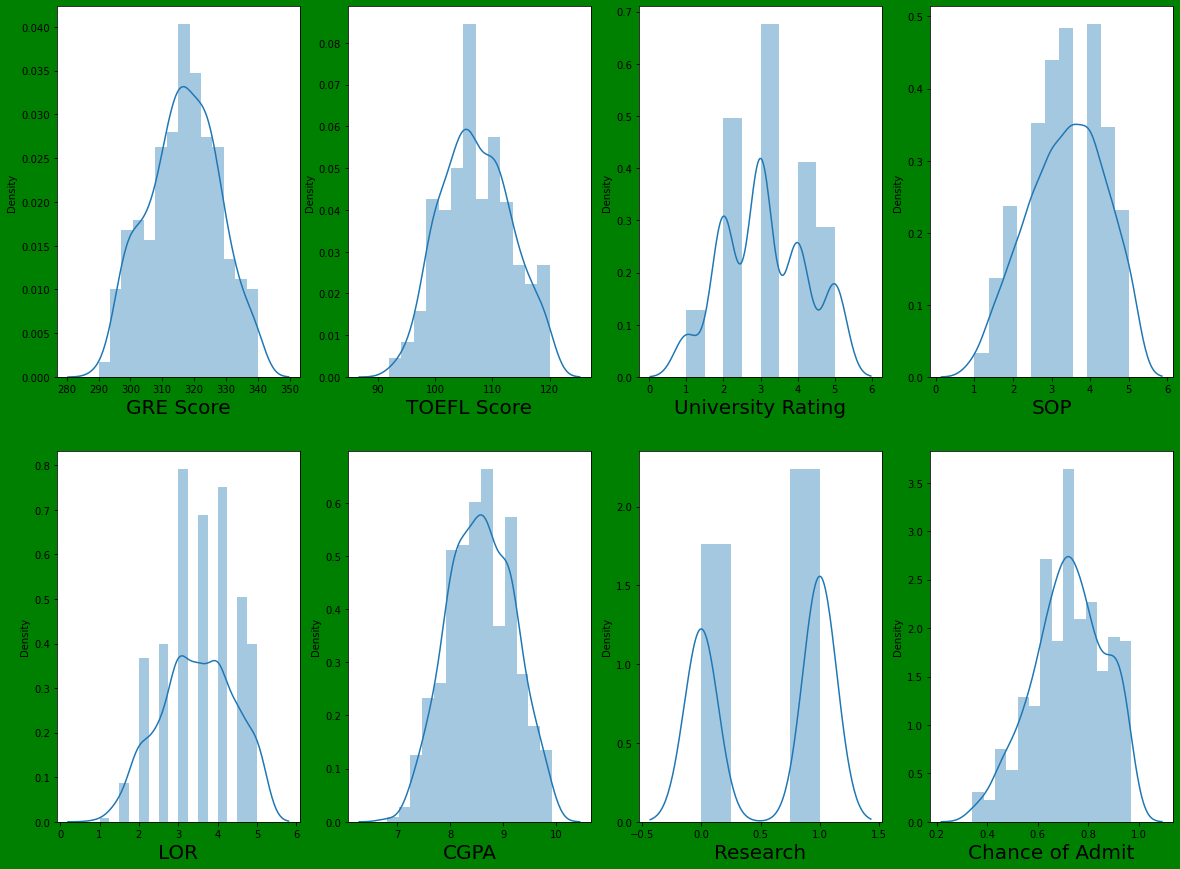

In [26]:
plt.figure(figsize = (20, 15), facecolor = 'green')

graph = 1

for column in data:
    if graph <=10:
        ax = plt.subplot(2, 4, graph)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize = 20)
    graph +=1
plt.show()

In [33]:
x = data.drop(columns = ['Chance of Admit'])

In [34]:
y = data['Chance of Admit']

In [36]:
x.head(), y.head()

(    GRE Score  TOEFL Score  University Rating  SOP  LOR  CGPA  Research
 0  337.000000        118.0                4.0  4.5  4.5  9.65         1
 1  324.000000        107.0                4.0  4.0  4.5  8.87         1
 2  316.558763        104.0                3.0  3.0  3.5  8.00         1
 3  322.000000        110.0                3.0  3.5  2.5  8.67         1
 4  314.000000        103.0                2.0  2.0  3.0  8.21         0,
 0    0.92
 1    0.76
 2    0.72
 3    0.80
 4    0.65
 Name: Chance of Admit, dtype: float64)

KeyError: 'Chance of Admit'

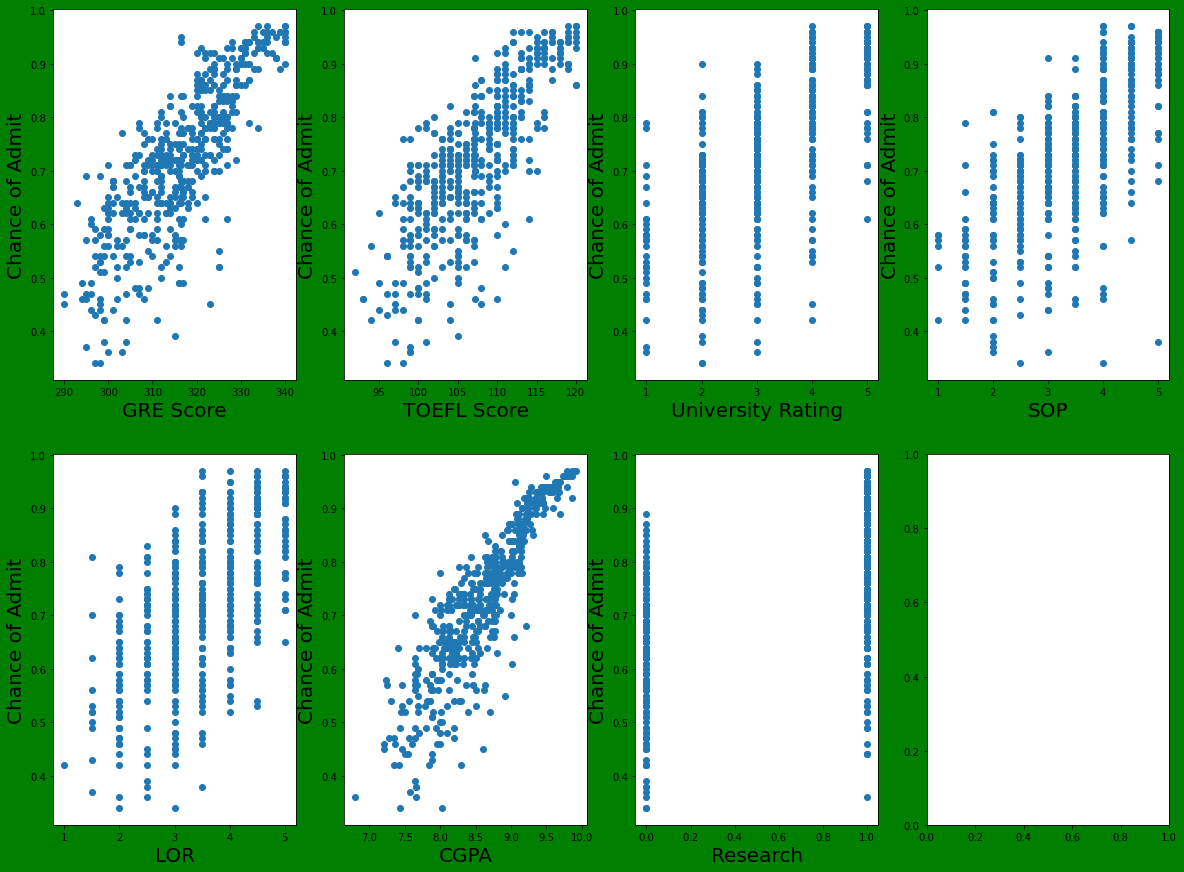

In [40]:
plt.figure(figsize = (20, 15), facecolor = 'green')

graph = 1

for column in data:
    if graph <=10:
        ax = plt.subplot(2, 4, graph)
        plt.scatter(x[column], y)
        plt.xlabel(column, fontsize = 20)
        plt.ylabel('Chance of Admit', fontsize = 20)
    graph +=1
plt.show()